## **NETFLIX DATA ANALYSIS**  






In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


In [120]:
df = pd.read_csv("NetflixOriginals.csv",encoding = "ISO-8859-1",parse_dates=["Premiere"])



In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [123]:
pd.DataFrame({'Total missing values':df.isna().sum(),
              'Percentage':(df.isna().sum()/len(df))*100})

,Total missing values,Percentage
Title,0,0.0
Genre,0,0.0
Premiere,0,0.0
Runtime,0,0.0
IMDB Score,0,0.0
Language,0,0.0


In [124]:
#SORU 1 :Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

runtime_data = df.sort_values("Runtime",ascending = False).head(20)
runtime_data[["Title","Runtime","Language"]]


,Title,Runtime,Language
561,The Irishman,209,English
328,Da 5 Bloods,155,English
581,Springsteen on Broadway,153,English
247,Citation,151,English
284,The Forest of Love,151,Japanese
509,Raat Akeli Hai,149,Hindi
7,The Last Days of American Crime,149,English
543,Ludo,149,Hindi
194,Army of the Dead,148,English
5,Drive,147,Hindi


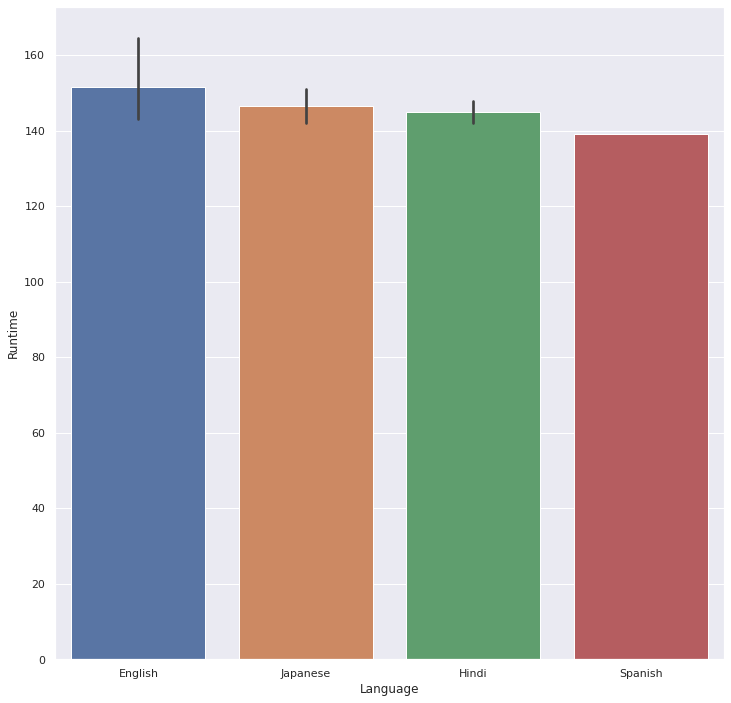

In [126]:
sns.barplot(x = 'Language',
            y = 'Runtime',
            data = runtime_data)
# Show the plot

plt.show()

In [127]:
#SORU 2 : 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

imdb_score_at_2019_to_2020 = df[(df["Genre"]=="Documentary") & ((df["Premiere"]>"01.01.2019") & (df["Premiere"]<"30.06.2020"))]
imdb_score_at_2019_to_2020[["Title","Premiere","IMDB Score"]]



,Title,Premiere,IMDB Score
0,Enter the Anime,2019-08-05,2.5
15,After the Raid,2019-12-19,4.3
20,"Hello Privilege. It's Me, Chelsea",2019-09-13,4.4
30,After Maria,2019-05-24,4.6
111,Ghosts of Sugar Land,2019-10-16,5.5
151,One Take,2020-06-18,5.7
263,A Tale of Two Kitchens,2019-05-22,6.3
286,The Legend of Cocaine Island,2019-03-29,6.3
290,Travis Scott: Look Mom I Can Fly,2019-08-28,6.3
295,Birders,2019-09-25,6.4


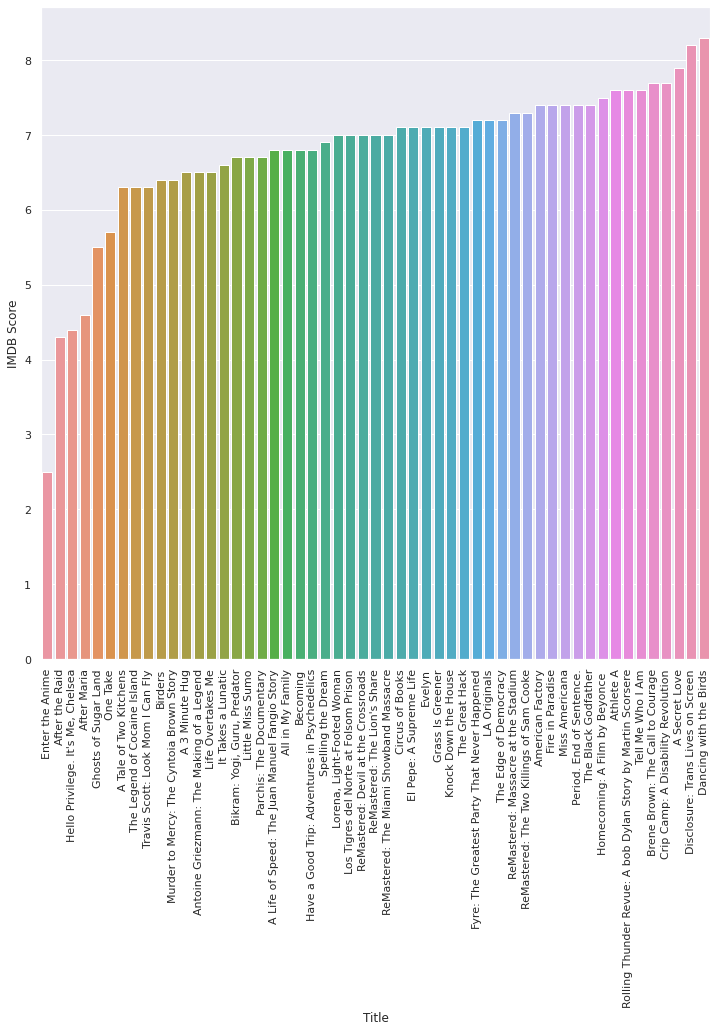

<Figure size 720x360 with 0 Axes>

In [128]:
ax=sns.barplot(x = 'Title',
            y = 'IMDB Score',
            data = imdb_score_at_2019_to_2020)
# Show the plot
plt.figure(figsize=(10,5))

plt.setp(ax.get_xticklabels(), rotation=90)



plt.show()




In [129]:
#SORU 3 :İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

eng_df = df[df["Language"].isin(["English"])]
eng_df.groupby(["Genre"]).agg({"IMDB Score":"max"}).sort_values("IMDB Score",ascending=False).head(1)



,IMDB Score
Genre,
Documentary,9.0


In [130]:
#soru 4: 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

df[df["Language"].isin(["Hindi"])]["Runtime"].mean()




115.78787878787878

In [131]:
#SORU 5:'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

categories_of_genre = df["Genre"].value_counts()

dataframe = categories_of_genre.to_frame().head(20)
dataframe


,Genre
Documentary,159
Drama,77
Comedy,49
Romantic comedy,39
Thriller,33
Comedy-drama,14
Crime drama,11
Biopic,9
Horror,9
Action,7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


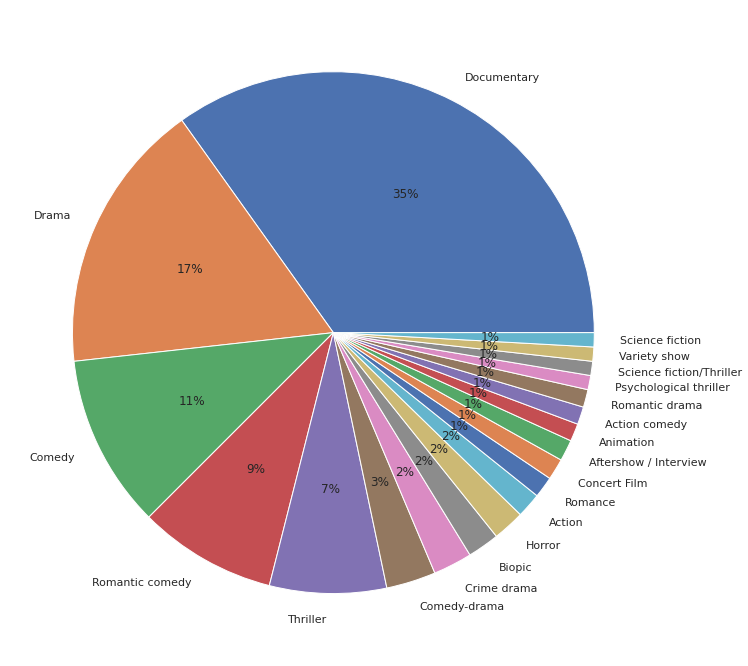

In [132]:
plt.pie(dataframe, labels = dataframe.index,  autopct='%.0f%%')
plt.show()

In [133]:
#SORU 6: Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

top3_language = df["Language"].value_counts().head(3)
top3_language

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [134]:
#SORU 7:IMDB puanı en yüksek olan ilk 10 film hangileridir?

top10_IMDB = df.sort_values("IMDB Score",ascending=False).head(10)
top10_IMDB[["Title","IMDB Score"]]

,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
578,Ben Platt: Live from Radio City Music Hall,8.4
577,Dancing with the Birds,8.3
576,Cuba and the Cameraman,8.3
573,Klaus,8.2
571,13th,8.2


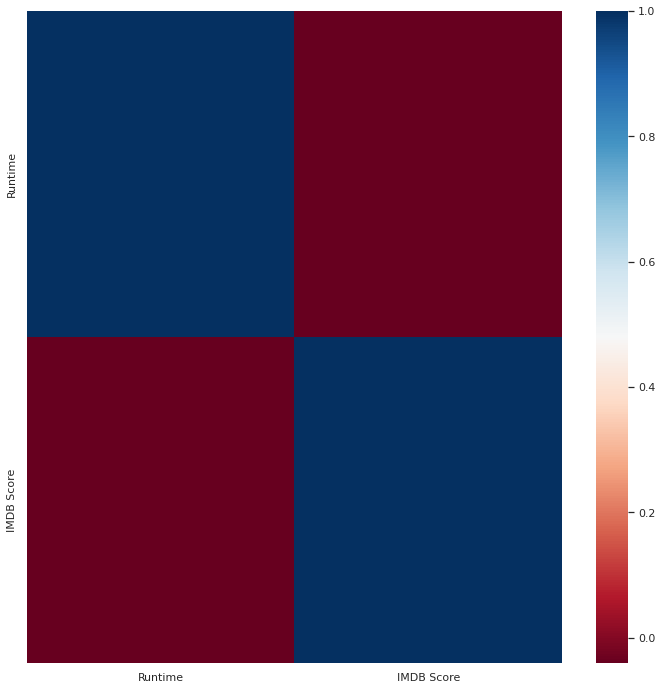

In [135]:
#SORU 8: IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
df.sort_values("IMDB Score",ascending=False).head(10)
num_cols = df.columns
corr = df[num_cols].corr()

df["Runtime"].corr(df["IMDB Score"])

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr,cmap="RdBu")
plt.show()


In [136]:
#SORU 9: IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.  

top10_IMDB_genre = df.sort_values("IMDB Score",ascending=False).head(10)
top10_IMDB_genre[["Genre","IMDB Score"]] 



,Genre,IMDB Score
583,Documentary,9.0
582,Documentary,8.6
581,One-man show,8.5
580,Documentary,8.4
579,Concert Film,8.4
578,Concert Film,8.4
577,Documentary,8.3
576,Documentary,8.3
573,Animation/Christmas/Comedy/Adventure,8.2
571,Documentary,8.2


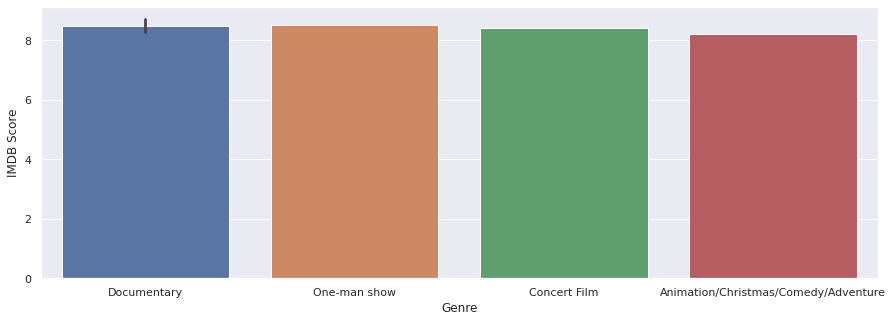

In [137]:
plt.figure(figsize=(15,5))
sns.barplot( x="Genre",
            y="IMDB Score",
            data = top10_IMDB)

plt.show()

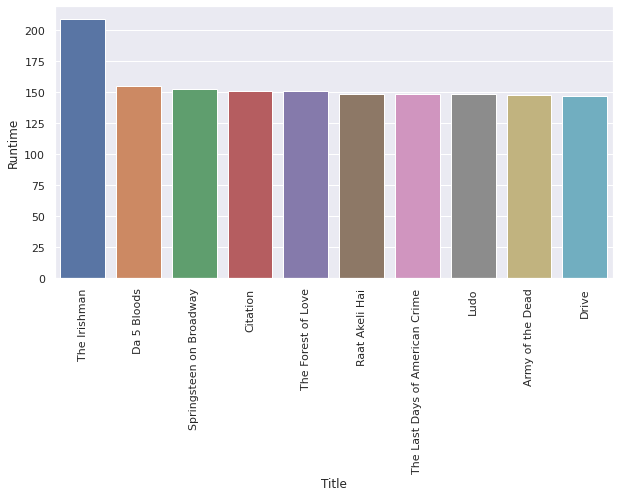

In [138]:
#SORU 10: 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.    

top10_runtime = df.sort_values("Runtime",ascending = False).head(10)
top10_runtime[["Title","Runtime"]]

plt.figure(figsize=(10,5))
ax=sns.barplot(x = "Title",
            y = "Runtime", 
            data = top10_runtime)
plt.setp(ax.get_xticklabels(), rotation=90)


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


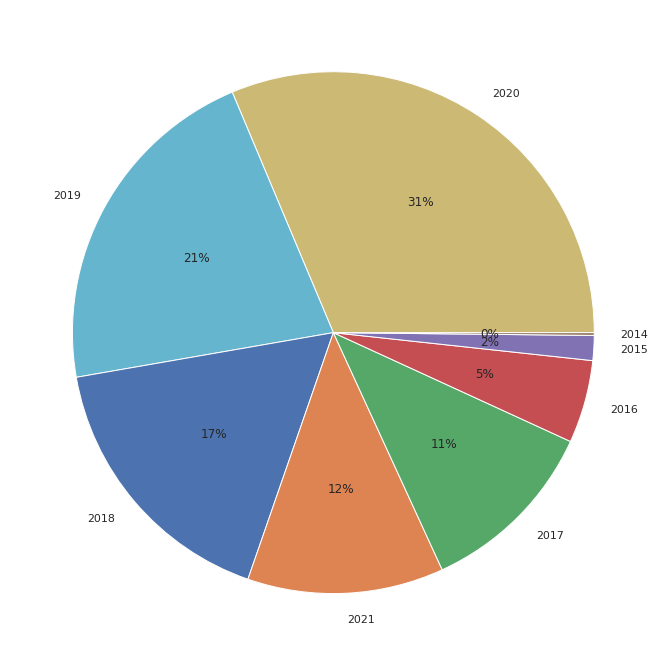

In [139]:
#SORU 11: Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

df['year'] = pd.DatetimeIndex(df['Premiere']).year

df["year"].value_counts().head(10)
numbers_of_films_at_years = df["year"].value_counts()

dataframe = numbers_of_films_at_years.to_frame()
plt.pie(dataframe)

plt.pie(dataframe, labels = dataframe.index,  autopct='%.0f%%')
plt.show()

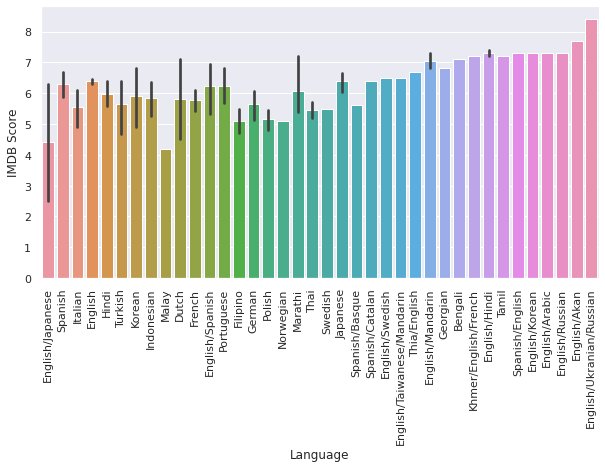

In [140]:
#SORU 12: Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

df.groupby(["Language"]).agg({"IMDB Score":"mean"}).sort_values("IMDB Score").head()

df[["Language","IMDB Score"]]

plt.figure(figsize=(10,5))
ax=sns.barplot(x = 'Language',
            y = 'IMDB Score',
            data = df)
# Show the plot
plt.setp(ax.get_xticklabels(), rotation=90)


plt.show()

In [141]:
#SORU 13: Hangi yılın toplam "runtime" süresi en fazladır?

df['year'] = pd.DatetimeIndex(df['Premiere']).year
df.groupby(["year"]).agg({"Runtime":"sum"}).sort_values(by="Runtime", ascending=False).head(1)



,Runtime
year,
2020,17384


In [142]:
#SORU 14: Her bir dilin en fazla kullanıldığı "Genre" nedir?

df.groupby(["Language"]).agg({"Genre":"value_counts"}).groupby(level=0).head(1)

df.groupby("Language")["Genre"].value_counts().groupby(level=0).head(1)


Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

In [143]:
#SORU 15: Veri setinde outlier veri var mıdır? Açıklayınız.


def quarters(columns):
  Q1=df[columns].quantile(0.25)
  Q3=df[columns].quantile(0.75)
  IQR=Q3-Q1
  min=Q3-1.5*IQR
  max=Q3+1.5*IQR
  return min,max



def outlier(columns):

  min,max=quarters(columns)
  if df[(df[columns] > max) | (df[columns] < min)].any(axis=None):
    outliners=df[(df[columns] > max) | (df[columns] < min)]
    return outliners
  else:
    return "Does not have outlier value"

outlier("Runtime")
outlier("IMDB Score")


,Title,Genre,Premiere,Runtime,IMDB Score,Language,year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020
5,Drive,Action,2019-11-01,147,3.5,Hindi,2019
6,Leyla Everlasting,Comedy,2020-12-04,112,3.7,Turkish,2020
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English,2020
8,Paradox,Musical/Western/Fantasy,2018-03-23,73,3.9,English,2018
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi,2021


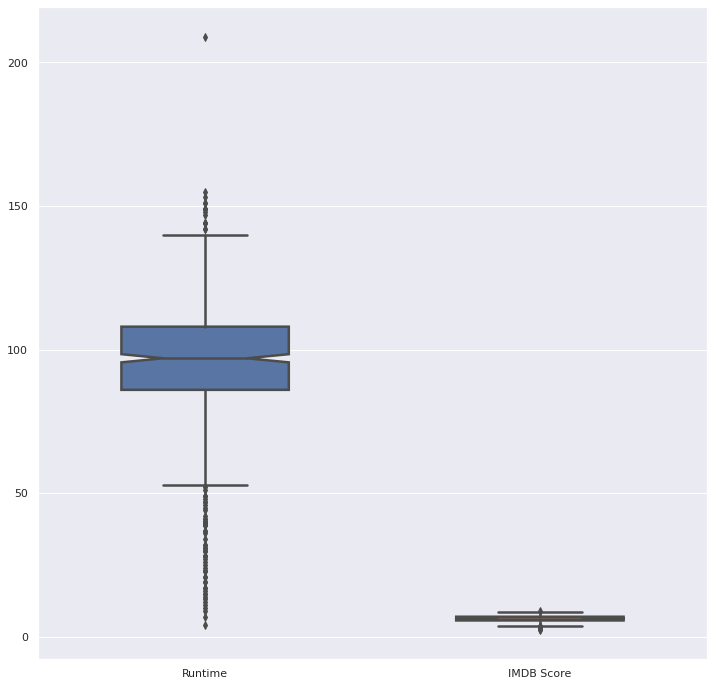

In [145]:
stats_df=df[["Runtime","IMDB Score"]]


sns.boxplot(data = stats_df, notch = True, linewidth = 2.5, width = 0.50)
